Please upload the dataset file (CSV format)


Saving Attition Prediction.csv to Attition Prediction.csv
Dataset Loaded Successfully!


,Age,Gender,Department,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Overtime,Distance_from_Home,Training_Hours_Last_Year,Attrition
0,42.262773,1,5,3,54797.52009,11.854268,4,2,0,0.320819,87.880731,1
1,57.926855,1,5,3,65097.93408,12.968807,4,2,0,3.404336,83.959554,1
2,53.342641,0,0,1,34688.67689,1.828962,4,2,1,27.713651,41.023354,1
3,49.805716,0,5,3,54144.52007,8.933529,2,2,0,19.306889,54.612628,1
4,31.876128,0,5,2,40776.98743,3.591278,1,1,1,26.385314,68.228264,1


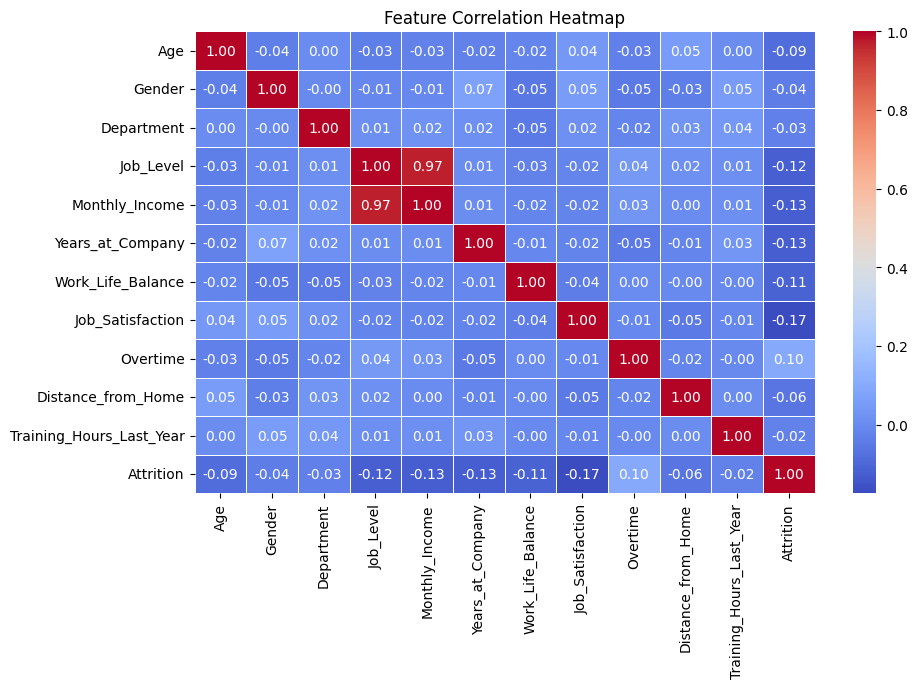

<ipython-input-1-644339f41dc1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="pastel")


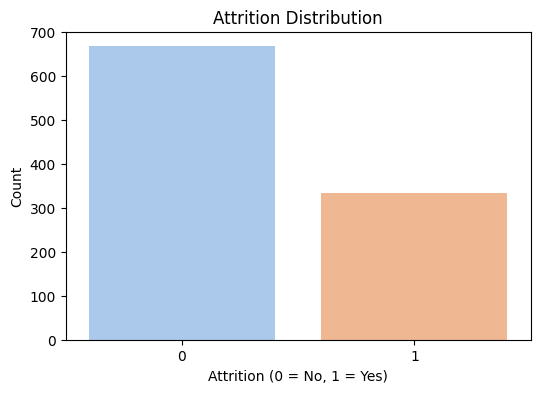

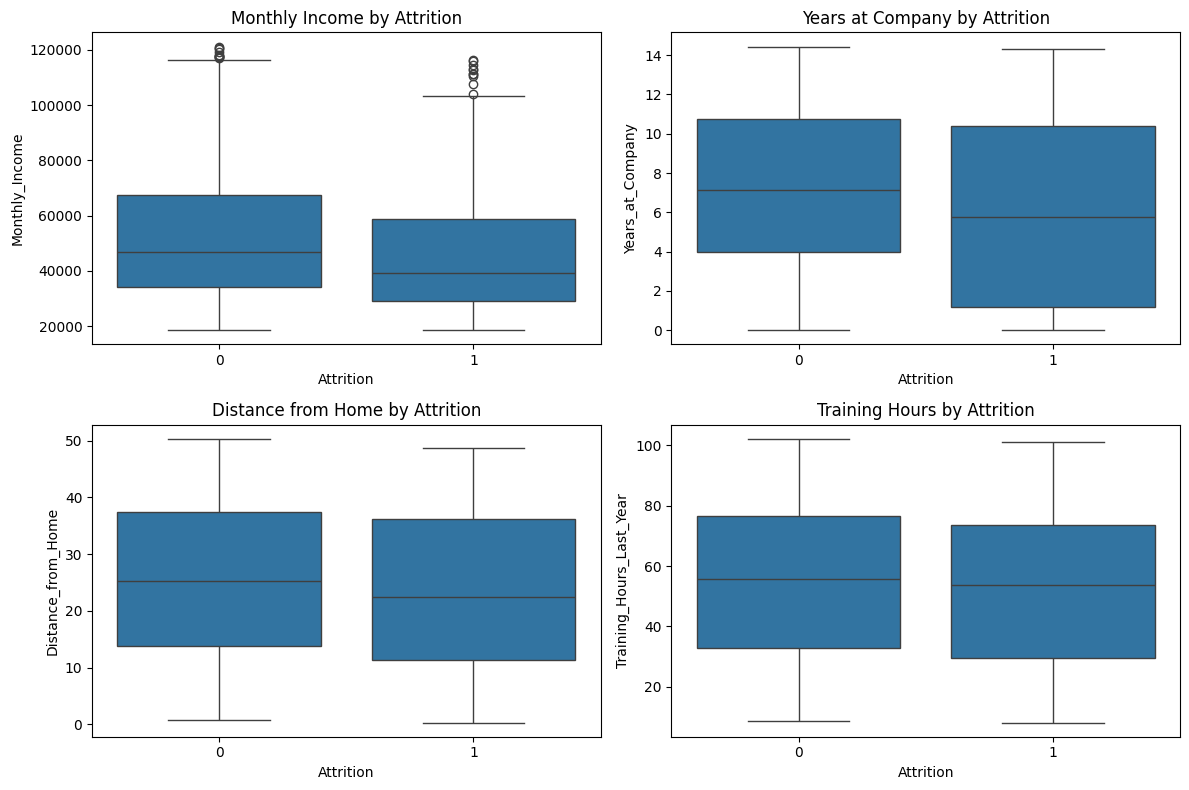

Model Accuracy: 84.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       133
           1       0.97      0.54      0.69        67

    accuracy                           0.84       200
   macro avg       0.89      0.76      0.79       200
weighted avg       0.86      0.84      0.83       200

Confusion Matrix:
 [[132   1]
 [ 31  36]]


<ipython-input-1-644339f41dc1>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


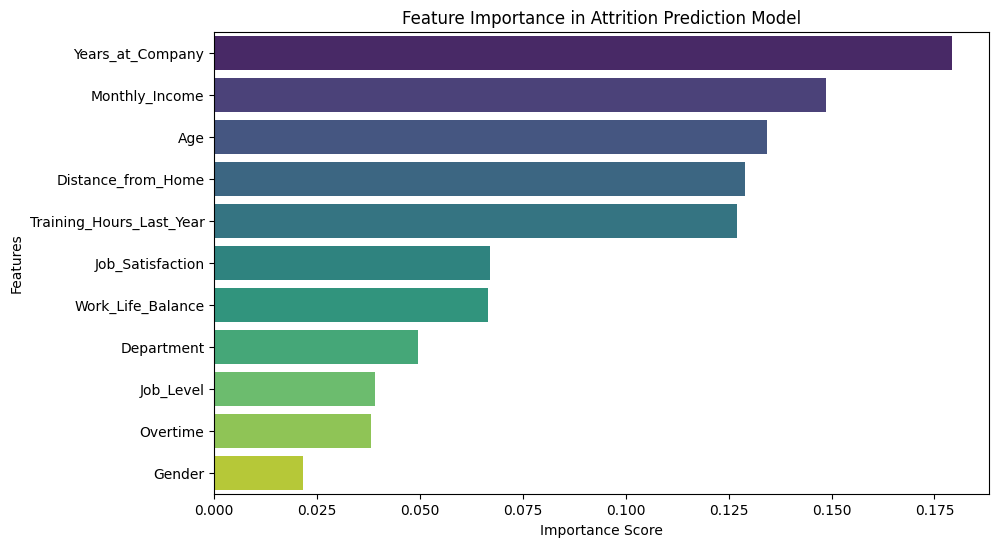

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# Step 1: Upload File
print("Please upload the dataset file (CSV format)")
uploaded = files.upload()

# Get file name
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Display basic info
print("Dataset Loaded Successfully!")
display(df.head())

def perform_eda(df):
    """Function to perform Exploratory Data Analysis"""
    # Correlation Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Attrition Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df["Attrition"], palette="pastel")
    plt.title("Attrition Distribution")
    plt.xlabel("Attrition (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()

    # Boxplots for key features
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x="Attrition", y="Monthly_Income", data=df, ax=axes[0, 0])
    axes[0, 0].set_title("Monthly Income by Attrition")
    sns.boxplot(x="Attrition", y="Years_at_Company", data=df, ax=axes[0, 1])
    axes[0, 1].set_title("Years at Company by Attrition")
    sns.boxplot(x="Attrition", y="Distance_from_Home", data=df, ax=axes[1, 0])
    axes[1, 0].set_title("Distance from Home by Attrition")
    sns.boxplot(x="Attrition", y="Training_Hours_Last_Year", data=df, ax=axes[1, 1])
    axes[1, 1].set_title("Training Hours by Attrition")
    plt.tight_layout()
    plt.show()

perform_eda(df)

# Step 2: Feature Selection and Model Training
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 3: Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Attrition Prediction Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
